## 0. Chapter 0
    0.1 Import libraries
    0.2 Read_csv
   
## 1. EDA
    1.1 Some classic EDA
    1.2 Extract product_category_n
    1.3 New DataFrame

## 2. Text Processing
    2.1 Functions
    2.2 Stop Words
    2.3 Process Text Function
    2.4 CountVectorizer & TfidfVectorizer
    2.5 PCA
    2.6 K-Means, TSNE, ARI_score 
    2.7 Word2VecCréation et entraînement du modèle Word2Vec
    2.8 BERT - Bidirectional Encoder Representations from Transformers
    2.9 USE - Universal Sentence Encoder
    
## 3.Image Processing
    3.1 Functions
    3.2 Image DataFrame
    3.3 ORB
        3.3.1 test on one image
        3.3.2 key points & descriptors
        3.3.3 descriptors clustering
        3.3.4 histograms
        3.3.5 PCA
        3.3.6 TSNE, K-Means, ARI score
        3.3.7 results
    3.4 CNN
        3.4.1 pre-processing
        3.4.2 ResNet50
        3.4.3 VGG16

## 0. Chapter 0

### 0.1 Import libraries

In [1]:
import os, sys, time
from os import listdir

import pandas as pd
import numpy as np
import math

# plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.image import imread

# sklearn
from sklearn import cluster
from sklearn import manifold
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# nltk
import nltk 
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, words 



# tensorflow
# !pip install tensorflow==2.7.0 --user
# !pip install tensorflow_hub==0.10.0 --user
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__)
print(hub.__version__)
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras.layers.normalization
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16


# Word2Vec
import gensim

# Bert
import transformers
from transformers import *


# cv2
import cv2

from wordcloud import WordCloud
from PIL import Image

from pandarallel import pandarallel

import pickle

import logging
logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

2.7.0
0.10.0


C:\Users\emanu\Anaconda_3\lib\site-packages\transformers\generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


### 0.2 Read_csv

In [2]:
path = "./Projet_6_files/Projet_6_dataset.csv"
data = pd.read_csv(path)
data

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

## 1. EDA

### 1.1 Some classic EDA

In [3]:
data.sample(10)

uniq_id            crawl_timestamp  \
526   9059227d71995f88a1f48ff63830f716  2016-01-07 05:50:25 +0000   
865   8f41c6931b5220c2bb34d1cab21cb220  2016-04-11 14:09:33 +0000   
381   079d049de21fb2426b516a8d2f9a8bdb  2015-12-01 06:13:00 +0000   
330   394c2c627914e1eed9b8ac343583a679  2015-12-01 06:13:00 +0000   
187   f69bef5db54cb4c83b2aa8d0ce829d4e  2015-12-01 12:40:44 +0000   
1040  3b465b02720ef7c930cb2e065a8fc05d  2015-12-01 10:15:43 +0000   
786   c705a5735a94aeee547d1798e3e46ec4  2015-12-12 11:46:53 +0000   
70    9ba898ecb77ab5a6799c8b047c6b6008  2016-04-19 05:00:32 +0000   
648   9656b0a52d364da5eed38a4bb2d9f6e5  2016-03-03 22:49:41 +0000   
190   b46d7b8e6826ad4c8b40a991da0f54d7  2015-12-01 12:40:44 +0000   

                                            product_url  \
526   http://www.flipkart.com/fluid-fu203-gr01-analo...   
865   http://www.flipkart.com/kawal-fashion-pyjama-b...   
381   http://www.flipkart.com/envy-1000-intense-magn...   
330   http://www.flipkart.com/asus-rt-n12-lx-300mbps...   
187   http://www.flipkart.com/prithish-wild-free-cer...   
1040  http://www.flipkart.com/elite-collection-mediu...   
786   http://www.flipkart.com/perucci-pc-122-decker-...   
70    http://www.flipkart.com/caffeine-handmade-trib...   
648   http://www.flipkart.com/esteem-baby-boy-s-draw...   
190   http://www.flipkart.com/rockmantra-vintage-sea...   

                                           product_name  \
526    Fluid FU203-GR01 Analog-Digital Watch  - For Men   
865             kawal fashion Pyjama Baby Girl's  Combo   
381                Envy 1000 Intense,Magnetic Combo Set   
330              Asus RT-N12 LX 300Mbps Wireless Router   
187                  Prithish Wild And Free Ceramic Mug   
1040            Elite Collection Medium Acrylic Sticker   
786       Perucci PC-122 Decker Analog Watch  - For Men   
70    Caffeine Handmade Tribal Print Influenced Kato...   
648                            Esteem Baby Boy's Drawer   
190          Rockmantra Vintage Sea Evening Ceramic Mug   

                                  product_category_tree               pid  \
526   ["Watches >> Wrist Watches >> Fluid Wrist Watc...  WATDUK7DV6GSTKRD   
865   ["Baby Care >> Infant Wear >> Baby Girls' Clot...  ACBEHGARRYXEA4FA   
381   ["Beauty and Personal Care >> Fragrances >> De...  CAGEBTGEZYMKVZQV   
330   ["Computers >> Network Components >> Routers >...  RTRD6352VX7RZSWG   
187   ["Kitchen & Dining >> Coffee Mugs >> Prithish ...  MUGEB7J7GPWUH6Q5   
1040  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88KNANBFKHYM   
786   ["Watches >> Wrist Watches >> Perucci Wrist Wa...  WATE75EHNMSYBHHA   
70    ["Kitchen & Dining >> Consumables & Disposable...  BWLEHTBPHRBSDEYF   
648   ["Baby Care >> Infant Wear >> Baby Boys' Cloth...  BLREFZGNFDU3KFPH   
190   ["Kitchen & Dining >> Coffee Mugs >> Rockmantr...  MUGEAGGKKZ7ADH6X   

      retail_price  discounted_price                                 image  \
526          899.0             899.0  9059227d71995f88a1f48ff63830f716.jpg   
865         1900.0             599.0  8f41c6931b5220c2bb34d1cab21cb220.jpg   
381          390.0             350.0  079d049de21fb2426b516a8d2f9a8bdb.jpg   
330         3950.0            1990.0  394c2c627914e1eed9b8ac343583a679.jpg   
187          499.0             175.0  f69bef5db54cb4c83b2aa8d0ce829d4e.jpg   
1040        1299.0             999.0  3b465b02720ef7c930cb2e065a8fc05d.jpg   
786         1600.0             290.0  c705a5735a94aeee547d1798e3e46ec4.jpg   
70          2999.0             699.0  9ba898ecb77ab5a6799c8b047c6b6008.jpg   
648          800.0             398.0  9656b0a52d364da5eed38a4bb2d9f6e5.jpg   
190          499.0             199.0  b46d7b8e6826ad4c8b40a991da0f54d7.jpg   

      is_FK_Advantage_product  \
526                      True   
865                     False   
381                     False   
330                     False   
187                     False   
1040                    False   
786                     False   


In [4]:
data.isna().mean().sort_values()

uniq_id                    0.000000
crawl_timestamp            0.000000
product_url                0.000000
product_name               0.000000
product_category_tree      0.000000
pid                        0.000000
image                      0.000000
is_FK_Advantage_product    0.000000
description                0.000000
product_rating             0.000000
overall_rating             0.000000
retail_price               0.000952
discounted_price           0.000952
product_specifications     0.000952
brand                      0.321905
dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [6]:
data.dtypes.value_counts()

object     12
float64     2
bool        1
dtype: int64

In [7]:
data.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

In [8]:
data.nunique() *100/len(data)

uniq_id                    100.000000
crawl_timestamp             14.190476
product_url                100.000000
product_name               100.000000
product_category_tree       61.142857
pid                        100.000000
retail_price                33.714286
discounted_price            40.380952
image                      100.000000
is_FK_Advantage_product      0.190476
description                100.000000
product_rating               2.571429
overall_rating               2.571429
brand                       46.666667
product_specifications      93.714286
dtype: float64

In [9]:
t = data['description'].str.len()

##### len of description

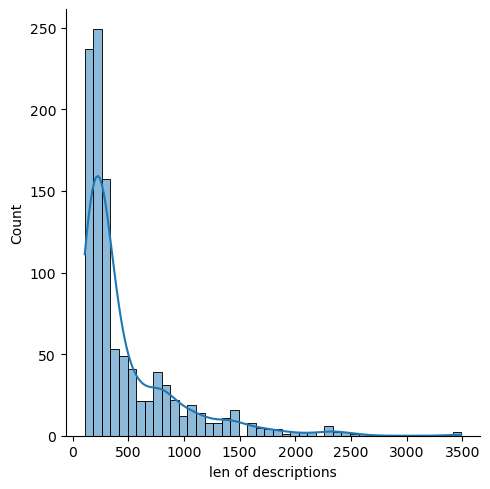

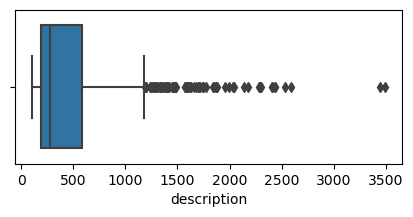

In [10]:
sns.displot(data['description'].str.len(), kde=True)
plt.xlabel('len of descriptions')
plt.show()
plt.close('all')

plt.figure(figsize=(5,2))
sns.boxplot(data['description'].str.len())
plt.show()


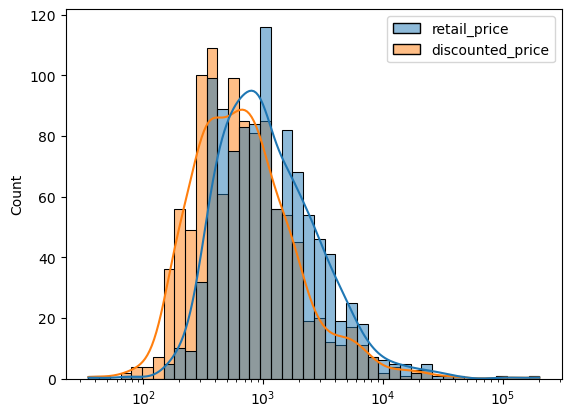

In [11]:
sns.histplot(data[['retail_price','discounted_price']], kde=True, log_scale=True,  legend=True)
plt.show()
plt.close('all')

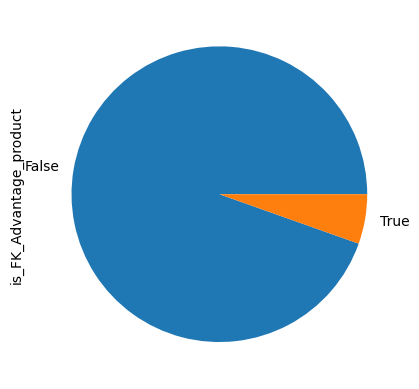

In [12]:
data.is_FK_Advantage_product.value_counts().plot(kind='pie')
plt.show()
plt.close('all')

In [13]:
data.corr()

retail_price  discounted_price  \
retail_price                 1.000000          0.990065   
discounted_price             0.990065          1.000000   
is_FK_Advantage_product      0.037863          0.046284   

                         is_FK_Advantage_product  
retail_price                            0.037863  
discounted_price                        0.046284  
is_FK_Advantage_product                 1.000000

In [14]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

### 1.2 Extract product_category_n

In [15]:
n=3
data['product_category_>{}'.format(n)] = data['product_category_tree'].str[2:-2]
for i in range(n):
    data[['product_category_{}'.format(i+1),'product_category_>{}'.format(n)]]=data['product_category_>{}'.format(n)].str.split(">>", n=1, expand=True)


data.sample(5)



uniq_id            crawl_timestamp  \
668  3f025b9dc8065fe5a155573e5b21a70d  2015-12-31 09:19:31 +0000   
455  3b0f02b3acf1825f8bbc1fb3b860dbb8  2015-12-03 21:49:05 +0000   
587  6b04c746cac2aa811d7a8753e54dc96e  2016-01-07 05:50:25 +0000   
471  10ad262ebfdc8614e847d36e6fe9ecf9  2016-04-16 13:01:18 +0000   
563  e15195f2a5ebaa2168ccd65324e65e8e  2016-01-07 05:50:25 +0000   

                                           product_url  \
668  http://www.flipkart.com/ornate-7-w-led-bulb/p/...   
455  http://www.flipkart.com/milton-school-750-ml-w...   
587  http://www.flipkart.com/maxima-07034lmli-attiv...   
471  http://www.flipkart.com/giftsthatwow-gtw-g-04/...   
563  http://www.flipkart.com/fluid-fs201-bl01-analo...   

                                          product_name  \
668                                Ornate 7 W LED Bulb   
455                  Milton School 750 ml Water Bottle   
587  Maxima 07034LMLI Attivo Analog Watch  - For Women   
471                              giftsthatwow GTW-G-04   
563  Fluid FS201-BL01 Analog-Digital Watch  - For W...   

                                 product_category_tree               pid  \
668  ["Kitchen & Dining >> Lighting >> Bulbs >> Orn...  BLBECSRFVRR7XCZH   
455  ["Kitchen & Dining >> Containers & Bottles >> ...  WBTDMEZTDSZGZEDJ   
587  ["Watches >> Wrist Watches >> Maxima Wrist Wat...  WATDYFQ557AP8EVM   
471  ["Kitchen & Dining >> Bar & Glassware >> Bar G...  GLSEHEHZPZZA83QJ   
563  ["Watches >> Wrist Watches >> Fluid Wrist Watc...  WATDUK7DKS6AJZYK   

     retail_price  discounted_price                                 image  \
668         375.0             209.0  3f025b9dc8065fe5a155573e5b21a70d.jpg   
455         184.0             175.0  3b0f02b3acf1825f8bbc1fb3b860dbb8.jpg   
587         675.0             641.0  6b04c746cac2aa811d7a8753e54dc96e.jpg   
471        1200.0             800.0  10ad262ebfdc8614e847d36e6fe9ecf9.jpg   
563         999.0             999.0  e15195f2a5ebaa2168ccd65324e65e8e.jpg   

     is_FK_Advantage_product  \
668                    False   
455                    False   
587                    False   
471                    False   
563                     True   

                                           description       product_rating  \
668  Buy Ornate 7 W LED Bulb for Rs.209 online. Orn...                    5   
455  Flipkart.com: Buy Milton School 750 ml Water B...                    5   
587  Maxima 07034LMLI Attivo Analog Watch  - For Wo...  No rating available   
471  Specifications of giftsthatwow GTW-G-04 (300 m...  No rating available   
563  Fluid FS201-BL01 Analog-Digital Watch  - For W...  No rating available   

          overall_rating         brand  \
668                    5        Ornate   
455                    5           NaN   
587  No rating available           NaN   
471  No rating available  giftsthatwow   
563  No rating available           NaN   

                                product_specifications  \
668  {"product_specification"=>[{"key"=>"Brand", "v...   
455  {"product_specification"=>[{"key"=>"Series", "...   
587  {"product_specification"=>[{"key"=>"Type", "va...   
471  {"product_specification"=>[{"key"=>"Brand", "v...   
563  {"product_specification"=>[{"key"=>"Other Func...   

                                   product_category_>3 product_category_1  \
668                                       Ornate Bulbs  Kitchen & Dining    
455                           Milton Bottles & Sippers  Kitchen & Dining    
587                                               None           Watches    
471   giftsthatwow Bar Glasses >> giftsthatwow GTW-...  Kitchen & Dining    
563                                               None           Watches    

         product_category_2     product_category_3  
668               Lighting                  Bulbs   
455   Containers & Bottles      Bottles & Sippers   
587          Wrist Watches    Maxima Wrist Watches  
471        Bar & Glassware            Bar Glasses   
563  

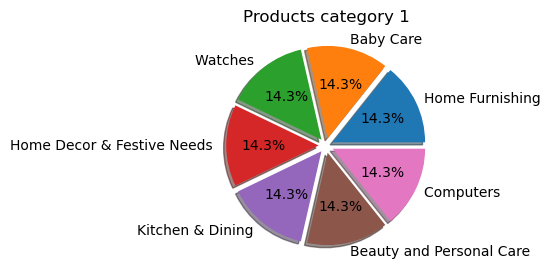



----------------------------------------------------------------------------------------------------




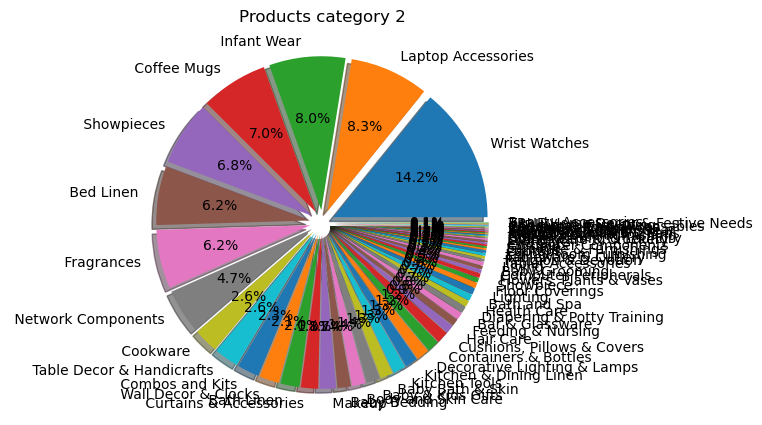

In [16]:
# product_category_1
y = data['product_category_1'].value_counts()
plt.figure(figsize=(3,3))
plt.title('Products category 1')
y.plot.pie(explode=(.08,)*len(y),shadow=True,autopct='%1.1f%%')
plt.ylabel(None)
plt.show()
plt.close('all')


# product_category_2
y = data['product_category_2'].value_counts()
print ('\n\n'+"-"*100+'\n\n')
plt.figure(figsize=(5,5))
plt.title('Products category 2')
y.plot.pie(explode=(.08,)*len(y),shadow=True,autopct='%1.1f%%')
plt.ylabel(None)
plt.show()
plt.close('all')

In [17]:
data['product_category_1'].value_counts()


Home Furnishing                150
Baby Care                      150
Watches                        150
Home Decor & Festive Needs     150
Kitchen & Dining               150
Beauty and Personal Care       150
Computers                      150
Name: product_category_1, dtype: int64

### 1.3 New DataFrame

In [18]:
df = data[['uniq_id','image','product_name','description','product_category_1']]


##### LabelEncoder

In [19]:
# label encoder
le = preprocessing.LabelEncoder()
df['product_category_encoder'] = le.fit_transform(df['product_category_1'])

y_cat_num = np.array(df['product_category_encoder'])
l_cat = df.groupby('product_category_encoder').agg(pd.Series.mode)['product_category_1'].tolist()

# conversions
display(df.groupby('product_category_encoder').agg(pd.Series.mode)['product_category_1'])

product_category_encoder
0                     Baby Care 
1      Beauty and Personal Care 
2                     Computers 
3    Home Decor & Festive Needs 
4               Home Furnishing 
5              Kitchen & Dining 
6                       Watches 
Name: product_category_1, dtype: object

## 2. Text Processing

### 2.1 Functions

In [20]:
def process_text_fct(doc,
                     stop_words,
                     min_len_words = 3, # included
                     lower = True,
                     lemm_or_stemm = 'lemm',
                     only_eng_words = True,
                     rejoin = True):
    """
    
    """
    corpus = doc.strip()
    
    token = word_tokenize(corpus)
        
    # min len words
    if min_len_words != None:
        filtered_w2 = [w for w in token if len(w) >= min_len_words]
    else:
        filtered_w2 = token
        
    # lower
    if lower :
        lower_words = [w.lower() for w in filtered_w2 if (not w.startswith("@")) and (not w.startswith("http"))]
    else:
        lower_words = filtered_w2
        
    # stop words
    if stop_words != None:
        filtered_w = [w for w in lower_words if not w in stop_words]
    else : 
        filtered_w = lower_words  
        
    # lemmatizer or Stemmer
    if lemm_or_stemm == 'lemm':
        lemmatizer = WordNetLemmatizer()
        list_words = [lemmatizer.lemmatize(w) for w in filtered_w]
    elif lemm_or_stemm == 'stem':
        stemmer = PorterStemmer()
        list_words = [stemmer.stem(w) for w in filtered_w] 
    else :
        list_words = filtered_w
        
    # only eng words
    if only_eng_words :
        eng_words = [i.lower() for i in words.words()]
        engl_text = [i for i in list_words if i in eng_words]
    else :
        engl_text = list_words
    
    # return a list or a string
    if rejoin :
        return " ".join(engl_text)
    
    return engl_text


In [21]:
def PCA_fct(data, inertia_percentage=99):
    X = data.values
    names= data.index

    n_comp= min(len(data),len(data.columns))

    # centering-scaled
    X = X.astype(np.float64)
    std_scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = std_scaler.transform(X)

    # Calculation of principal components
    pca = decomposition.PCA(n_components= n_comp)
    X_projected = pca.fit_transform(X_scaled)


    # display
    data_pca = pd.DataFrame(X_projected, index=data.index, columns=["F"+str(i+1) for i in range(n_comp)])
    
    # plot inertia percentage
    fig = plt.figure(figsize=(5,3))
    screes = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(screes))+1, screes)
    plt.plot(np.arange(len(screes))+1, screes.cumsum(),c="red",marker='o')
    plt.ylim(0,100)
    plt.xlabel("rank of the axis of inertia")
    plt.ylabel("inertia percentage")
    plt.grid()
    plt.show()
    
    print("Dataset shape before PCA : ", data.shape)
    # intertia_percentage
    if inertia_percentage != None:
        x = pd.DataFrame({'screes_sum_score':screes.cumsum()})
        inertia_value = len(x.loc[x['screes_sum_score']<=inertia_percentage])
        data_pca = data_pca.iloc[:,:inertia_value]
    print("Dataset shape after PCA : ", data_pca.shape)
    
    return data_pca

In [22]:
def ARI_fct(data) :
    time1 = time.time()
    num_labels=len(l_cat)
    
    # TSNE
    tsne = manifold.TSNE(n_components=2, 
                         perplexity=30, 
                         n_iter=2000, 
                         init='random', 
                         learning_rate=200, 
                         random_state=42)
    X_tsne = tsne.fit_transform(data)
    
    # Clustering
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    
    # ARI score
    ARI = np.round(adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_

In [23]:
def visu_fct(X_tsne, y_cat_num, labels, ARI, suptitle='TSNE') :
    
    
    # scores
    print("SCORES : ")
    print("ARI score : {}".format(ARI))
    
    f1 = np.round(f1_score(y_cat_num, labels, average='weighted'),4)
    print("f1 score : {}".format(f1))
    
    prec = np.round(precision_score(y_cat_num, labels, average='weighted'),4)
    print("precision score : {}".format(prec))
    
    rec = np.round(recall_score(y_cat_num, labels, average='weighted'), 4)
    print("recal score : {}".format(rec))
    
    print("\n"+"-"*100+"\n")
    
    # confusion matrix plot
    print("CONFUSION MATRIX :\n")
    plt.figure()
    conf_mat = metrics.confusion_matrix(y_true=y_cat_num, y_pred=labels, normalize='true')
    sns.heatmap(conf_mat, annot=True, yticklabels= l_cat)
    plt.show()
    plt.close('all')
    
    print("\n"+"-"*100+"\n")
    # TSNE
    print("TSNE PLOT :\n")
    # first plot 
    fig = plt.figure(figsize=(15,6))
    plt.suptitle(suptitle, fontsize=25, fontweight=20 )
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, bbox_to_anchor=(0.925, -0.05), ncol=2, fancybox=True, shadow=True, loc="best", title="Product_category_1")
    plt.title('Scatter plot on product_category_1')
    
    # second plot
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), bbox_to_anchor=(0.605, -0.05), ncol=2, fancybox=True, shadow=True, loc="best", title="Clusters")
    plt.title('Scatter plot on clusters')
    plt.show()
    plt.close('all')

##### BERT

In [24]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, 
                 bert_tokenizer, 
                 max_length) :
    """
    """
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot

In [25]:
# Fonction de création des features
def feature_BERT_fct(model, 
                     model_type, 
                     sentences, 
                     max_length, 
                     b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

#         if mode=='TFhub' : # Bert Tensorflow Hub
#             text_preprocessed = {"input_word_ids" : input_ids, 
#                                  "input_mask" : attention_mask, 
#                                  "input_type_ids" : token_type_ids}
#             outputs = model(text_preprocessed)
#             last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

##### USE

In [26]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

### 2.2 Stop Words

In [27]:
stop_words = stopwords.words('english')+ ['[', ']', ',', '.', ':', '?', '(', ')']
print(stop_words)
print("\nstop_words' length : \t{} \nstop_words' type: \t{}".format(len(stop_words), type(stop_words)))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 2.3 Process Text Function

In [28]:
# Test sentence
pd.options.display.max_colwidth = 500
# test_sentence = (df[.sample(1)]['description']).to_string()
test_sentence = (df.loc[500,'description'])
new_test_sentence = process_text_fct(test_sentence, stop_words=stop_words)

print("TEST process_text_fct :\n")
print("Before :\n{}\n\nLength : {}\n".format(test_sentence, len(test_sentence)))
print('-'*50+'\n')
print("After :\n{}\n\nLength : {}".format(new_test_sentence, len(new_test_sentence)))

pd.options.display.max_colwidth = 100

TEST process_text_fct :

Before :
Nexus NX_7668 Analog Watch  - For Men - Buy Nexus NX_7668 Analog Watch  - For Men  NX_7668 Online at Rs.999 in India Only at Flipkart.com. - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!

Length : 243

--------------------------------------------------

After :
nexus watch men buy nexus watch men india great discount genuine product day replacement guarantee free shipping cash delivery

Length : 126


In [29]:
df['description_clean'] = df['description'].apply(lambda x : process_text_fct(x, stop_words = stop_words))

In [30]:
df['product_name_clean'] = df['product_name'].apply(lambda x : process_text_fct(x, stop_words = stop_words))

In [31]:
df['corpus'] = df['product_name_clean'] + df['description_clean']

### 2.4 CountVectorizer & TfidfVectorizer

In [35]:
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words=stop_words, max_df=0.95, min_df=1)

# # test sentence
# print('TEST SENTENCE :')
# display((cvect.fit_transform(new_test_sentence)).toarray())
# print('-'*50+'\n')
# display((cvect.fit_transform(new_test_sentence)).toarray()) 


# fit_transform on corpus = description + product_name
cv_transform = cvect.fit_transform(df['corpus'])  
ctf_transform = ctf.fit_transform(df['corpus'])  


In [36]:
df_cv = pd.DataFrame(cv_transform.toarray())
df_ctf = pd.DataFrame(ctf_transform.toarray())

In [37]:
print('CountVectorizer DataFrame \n\nshape : {}'.format(df_cv.shape))
display(df_cv.sample(3))

print('\n'+'-'*50+'\n')

print('TfidfVectorizer DataFrame \n\nshape : {}'.format(df_ctf.shape))
display(df_ctf.sample(3))

CountVectorizer DataFrame 

shape : (1050, 3434)


0     1     2     3     4     5     6     7     8     9     ...  3424  \
967     0     0     0     0     0     0     0     0     0     0  ...     0   
167     0     0     0     0     0     0     0     0     0     0  ...     0   
948     0     0     0     0     0     0     0     0     0     0  ...     0   

     3425  3426  3427  3428  3429  3430  3431  3432  3433  
967     0     0     0     0     0     0     0     0     0  
167     0     0     0     0     0     0     0     0     0  
948     0     0     0     0     0     0     0     0     0  

[3 rows x 3434 columns]


--------------------------------------------------

TfidfVectorizer DataFrame 

shape : (1050, 3536)


0     1     2     3     4     5     6     7     8     9     ...  3526  \
563   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
228   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
219   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

     3527  3528  3529  3530  3531  3532  3533  3534  3535  
563   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
228   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
219   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[3 rows x 3536 columns]

### 2.5 PCA

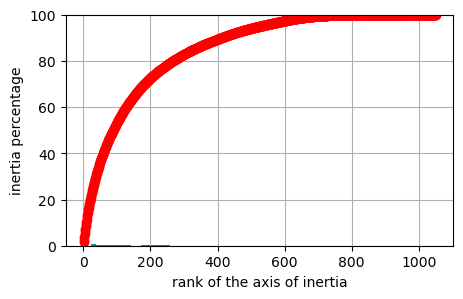

Dataset shape before PCA :  (1050, 3434)
Dataset shape after PCA :  (1050, 670)


F1        F2        F3        F4        F5        F6         F7  \
444   1.177230 -0.259300 -0.052449  0.302643  1.263253  0.296352   0.206219   
479  12.578416  0.556095  4.780845  8.034786 -4.159782 -8.455168 -33.596501   
749  -2.048973 -0.519402 -0.581582 -0.657623 -0.354085 -0.502359   0.983258   

            F8        F9       F10  ...      F661      F662      F663  \
444  -0.089287  0.044365 -1.625216  ...  0.281831  2.313943 -0.507857   
479 -20.645986  9.625152  4.845401  ... -0.020888  0.028098 -0.071911   
749   0.197001  0.530765  0.618040  ...  0.036792 -0.153943 -0.063845   

         F664      F665      F666      F667      F668      F669      F670  
444 -0.696689  0.278258  0.249320  0.363934 -1.295955 -0.286397  0.287122  
479 -0.034639 -0.063989 -0.170592 -0.068266  0.084942  0.031717  0.259434  
749  0.121851  0.134103  0.208540 -0.194089  0.129864  0.003260 -0.227528  

[3 rows x 670 columns]

In [38]:
df_cv_pca = PCA_fct(df_cv)
df_cv_pca.sample(3)

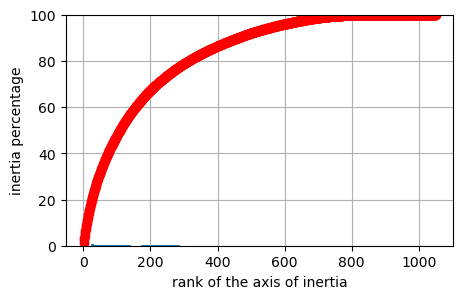

Dataset shape before PCA :  (1050, 3536)
Dataset shape after PCA :  (1050, 717)


F1        F2        F3        F4        F5        F6        F7  \
882 -0.885926 -0.621277 -1.362960 -0.143552 -0.400736 -0.405461 -0.966033   
880 -0.481602 -0.418803 -0.520120 -0.214265 -0.160712 -0.130830 -0.735045   
462  2.683311  3.786650  5.407293 -0.328401 -1.837562  6.093329 -1.950161   

           F8        F9       F10  ...      F708      F709      F710  \
882 -0.677428 -0.569927  0.895544  ... -1.102092  0.826421  1.052214   
880 -0.379036 -0.054650 -0.203430  ...  0.072691 -0.101827  0.312253   
462 -2.587586  1.649866 -0.977767  ...  0.004554 -0.008471  0.013228   

         F711      F712      F713      F714      F715      F716      F717  
882 -1.321314  0.313217  0.091503 -0.611459 -0.026098  0.046017 -0.086399  
880  0.096105  0.004257 -0.208179  0.086139  0.076255  0.008350  0.020003  
462  0.000312 -0.017579  0.002603 -0.024538 -0.007196  0.000378  0.007971  

[3 rows x 717 columns]

In [39]:
df_ctf_pca = PCA_fct(df_ctf)
df_ctf_pca.sample(3)

### 2.6 K-Means, TSNE, ARI_score 

In [40]:
ARI, X_tsne, labels = ARI_fct(df_ctf_pca)
df['TfidfVectorizer_clusters'] = labels

ARI :  0.1888 time :  9.0


SCORES : 
ARI score : 0.1888
f1 score : 0.0886
precision score : 0.0824
recal score : 0.1105

----------------------------------------------------------------------------------------------------

CONFUSION MATRIX :



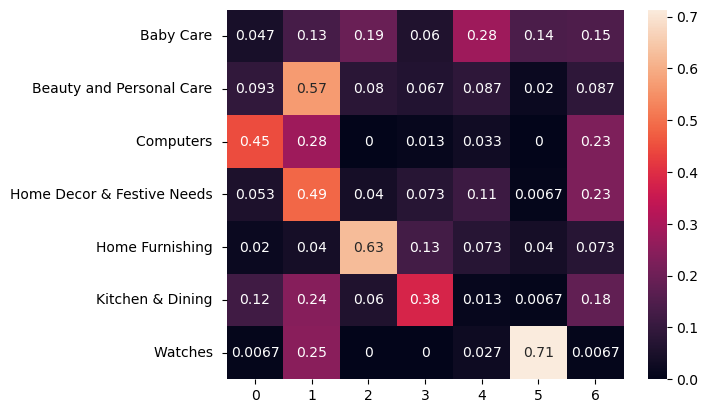


----------------------------------------------------------------------------------------------------

TSNE PLOT :



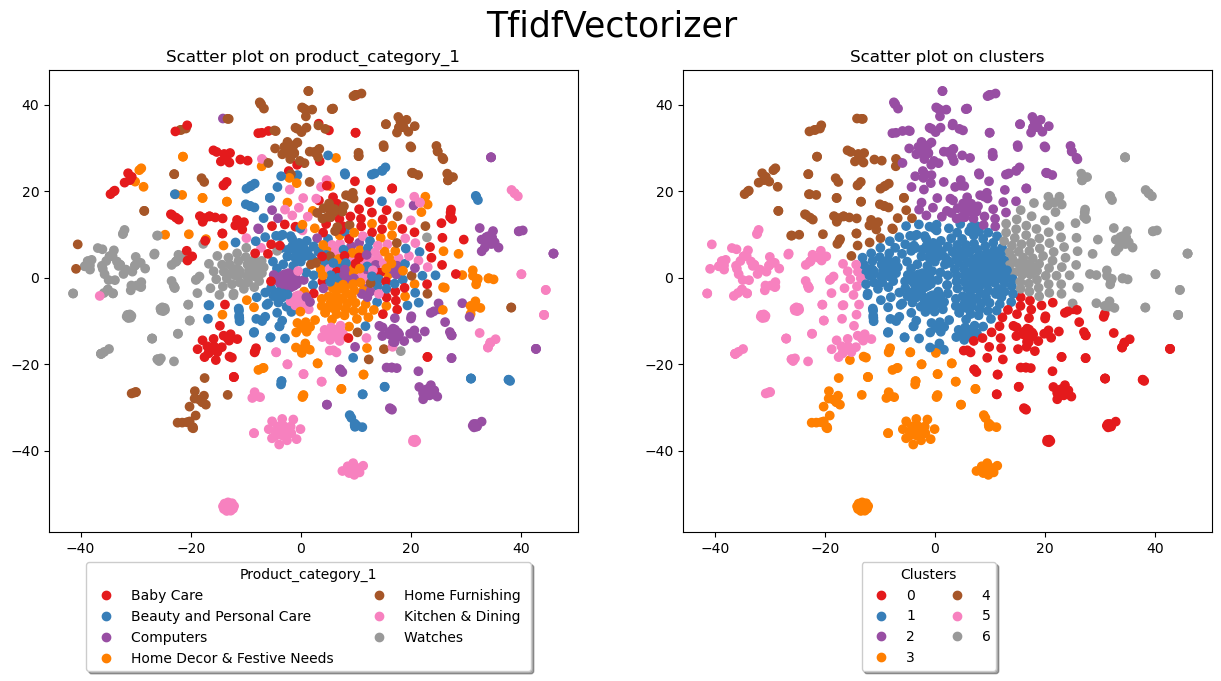

In [41]:
 visu_fct(X_tsne, y_cat_num, labels, ARI, 'TfidfVectorizer')

In [42]:
ARI, X_tsne, labels = ARI_fct(df_cv_pca)
df['CountVectorizer_clusters'] = labels

ARI :  0.1102 time :  9.0


SCORES : 
ARI score : 0.1102
f1 score : 0.1431
precision score : 0.1521
recal score : 0.1476

----------------------------------------------------------------------------------------------------

CONFUSION MATRIX :



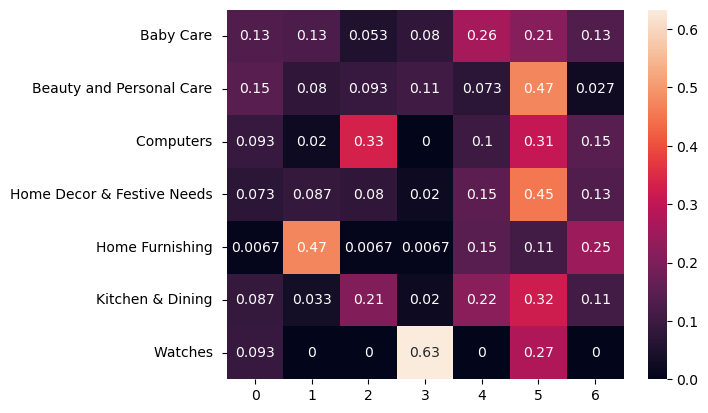


----------------------------------------------------------------------------------------------------

TSNE PLOT :



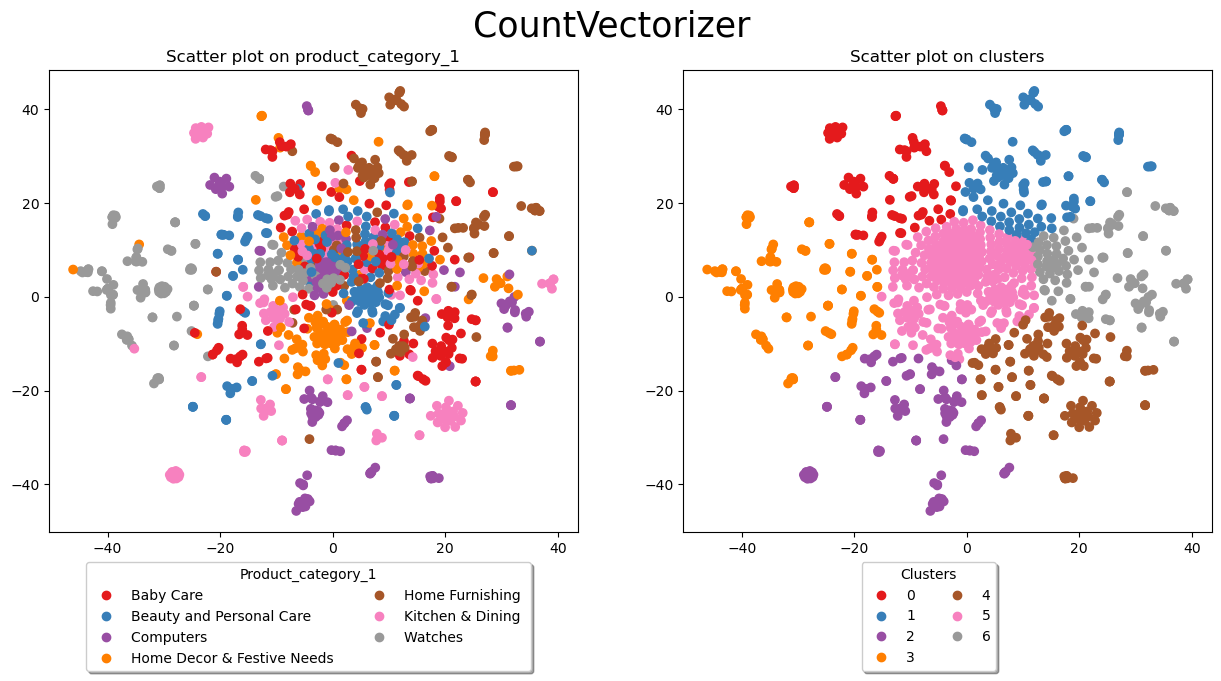

In [43]:
 visu_fct(X_tsne, y_cat_num, labels, ARI, 'CountVectorizer')

### 2.7 Word2Vec

In [44]:
w2v_size=340
w2v_window=7
w2v_min_count=3
w2v_epochs=150
maxlen = 650 # adapt to length of sentences
sentences = df['corpus'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [45]:
# Creation & training of Word2Vec model

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 1826
Word2Vec trained


In [46]:
# Tokenization

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 3463


In [47]:
# Embedding matrix

print("Create Embedding matrix ...")
# w2v_size = 340
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  0.5274
Embedding matrix: (3463, 340)


In [48]:
# Creating Word Embeddings

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 650)]             0         
                                                                 
 embedding (Embedding)       (None, 650, 340)          1177420   
                                                                 
 global_average_pooling1d (G  (None, 340)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,177,420
Trainable params: 1,177,420
Non-trainable params: 0
_________________________________________________________________


In [49]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

(1050, 340)

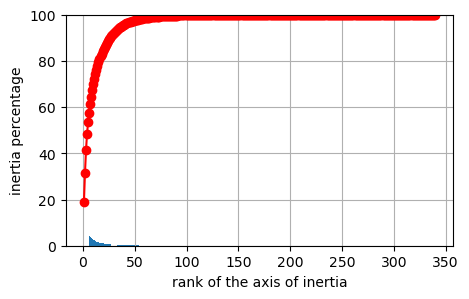

Dataset shape before PCA :  (1050, 340)
Dataset shape after PCA :  (1050, 68)


In [50]:
# PCA
W2V_pca = PCA_fct(pd.DataFrame(embeddings))

In [51]:
ARI, X_tsne, labels = ARI_fct(W2V_pca)
df['Word2Vec_clusters'] = labels

ARI :  0.3854 time :  8.0


SCORES : 
ARI score : 0.3854
f1 score : 0.1677
precision score : 0.2016
recal score : 0.1533

----------------------------------------------------------------------------------------------------

CONFUSION MATRIX :



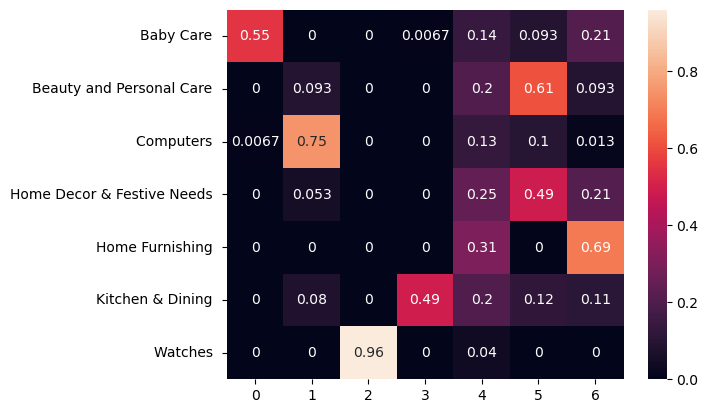


----------------------------------------------------------------------------------------------------

TSNE PLOT :



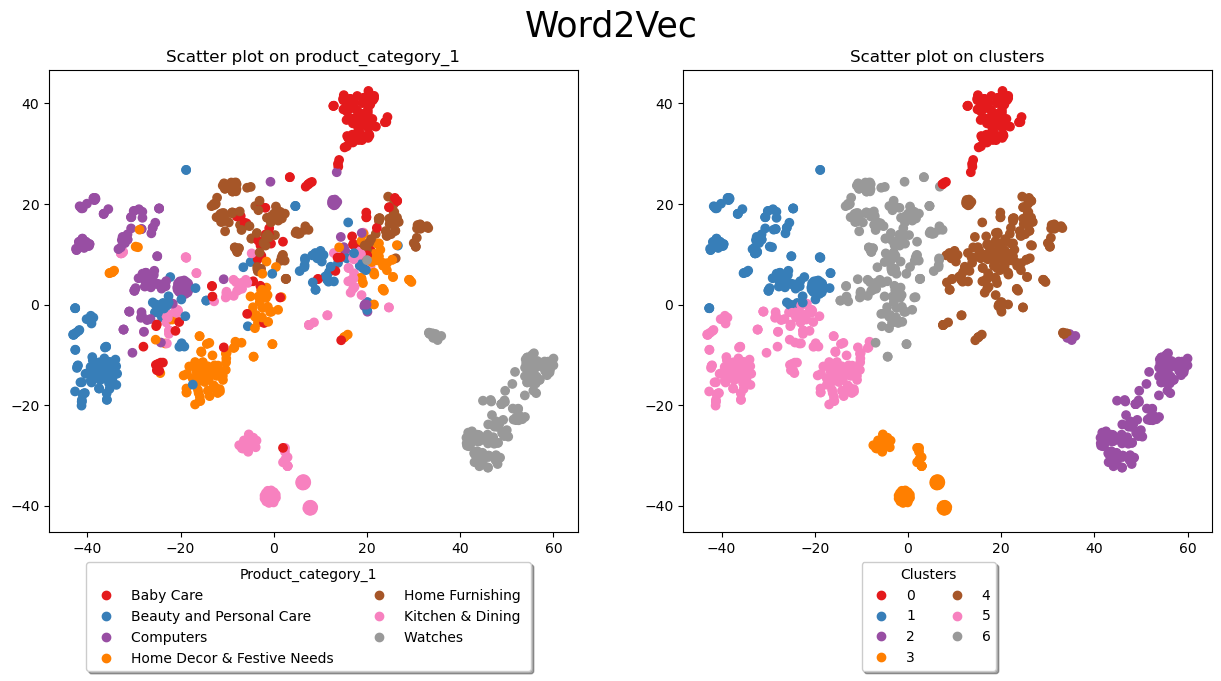

In [52]:
visu_fct(X_tsne, y_cat_num, labels, ARI, 'Word2Vec')

### 2.8 BERT - Bidirectional Encoder Representations from Transformers

In [53]:
os.environ["TF_KERAS"]='1'

In [54]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.7.0
2.7.0
Num GPUs Available:  0
True


In [55]:
max_length = 400
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df['corpus'].to_list()

In [56]:
# Build BERT features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

temps traitement :  597.0


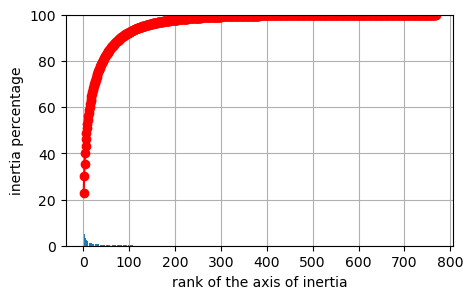

Dataset shape before PCA :  (1050, 768)
Dataset shape after PCA :  (1050, 274)


In [57]:
# PCA
bert_pca = PCA_fct(pd.DataFrame(features_bert))

In [58]:
ARI, X_tsne, labels = ARI_fct(bert_pca)
df['BERT_clusters'] = labels

ARI :  0.3017 time :  9.0


SCORES : 
ARI score : 0.3017
f1 score : 0.2284
precision score : 0.2537
recal score : 0.2133

----------------------------------------------------------------------------------------------------

CONFUSION MATRIX :



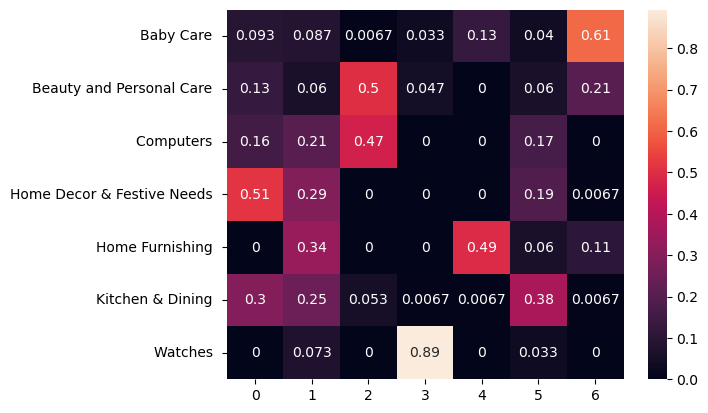


----------------------------------------------------------------------------------------------------

TSNE PLOT :



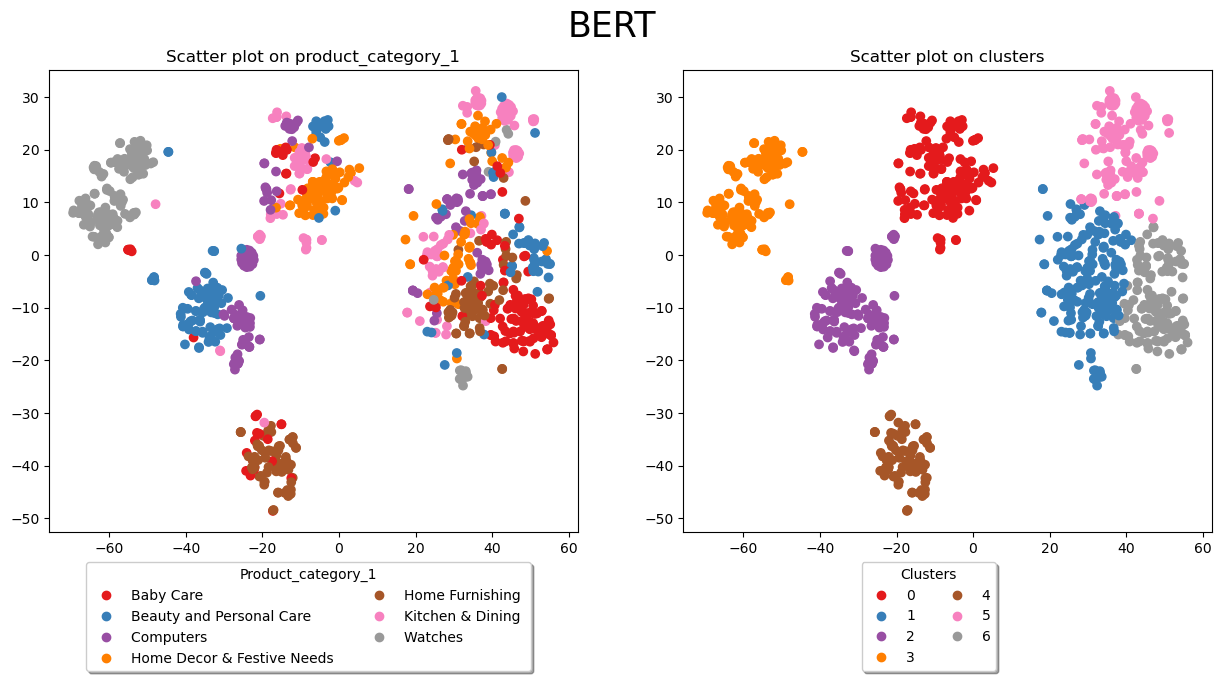

In [59]:
visu_fct(X_tsne, y_cat_num, labels, ARI, 'BERT')

### 2.9 USE - Universal Sentence Encoder

In [60]:
os.environ["TF_KERAS"]='1'

In [61]:
print("tensorflow version : \t{}".format(tf.__version__))
print("tensorflow_hub version : \t{}".format(hub.__version__))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

tensorflow version : 	2.7.0
tensorflow_hub version : 	0.10.0
Num GPUs Available:  0
True


In [62]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [63]:
batch_size = 10
sentences = df['corpus'].to_list()

In [64]:
features_USE = feature_USE_fct(sentences, batch_size)

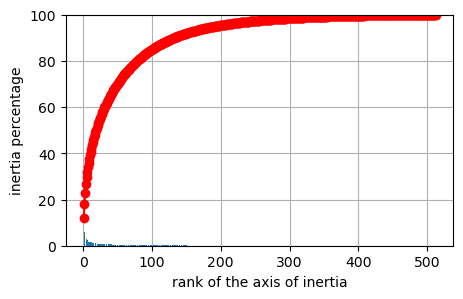

Dataset shape before PCA :  (1050, 512)
Dataset shape after PCA :  (1050, 335)


In [65]:
# PCA
use_pca = PCA_fct(pd.DataFrame(features_USE))

In [66]:
ARI, X_tsne, labels = ARI_fct(use_pca)
df['USE_clusters'] = labels

ARI :  0.3614 time :  9.0


SCORES : 
ARI score : 0.3614
f1 score : 0.2268
precision score : 0.2196
recal score : 0.2362

----------------------------------------------------------------------------------------------------

CONFUSION MATRIX :



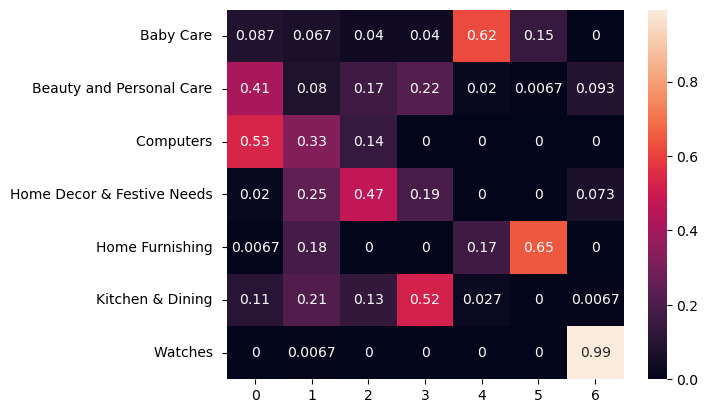


----------------------------------------------------------------------------------------------------

TSNE PLOT :



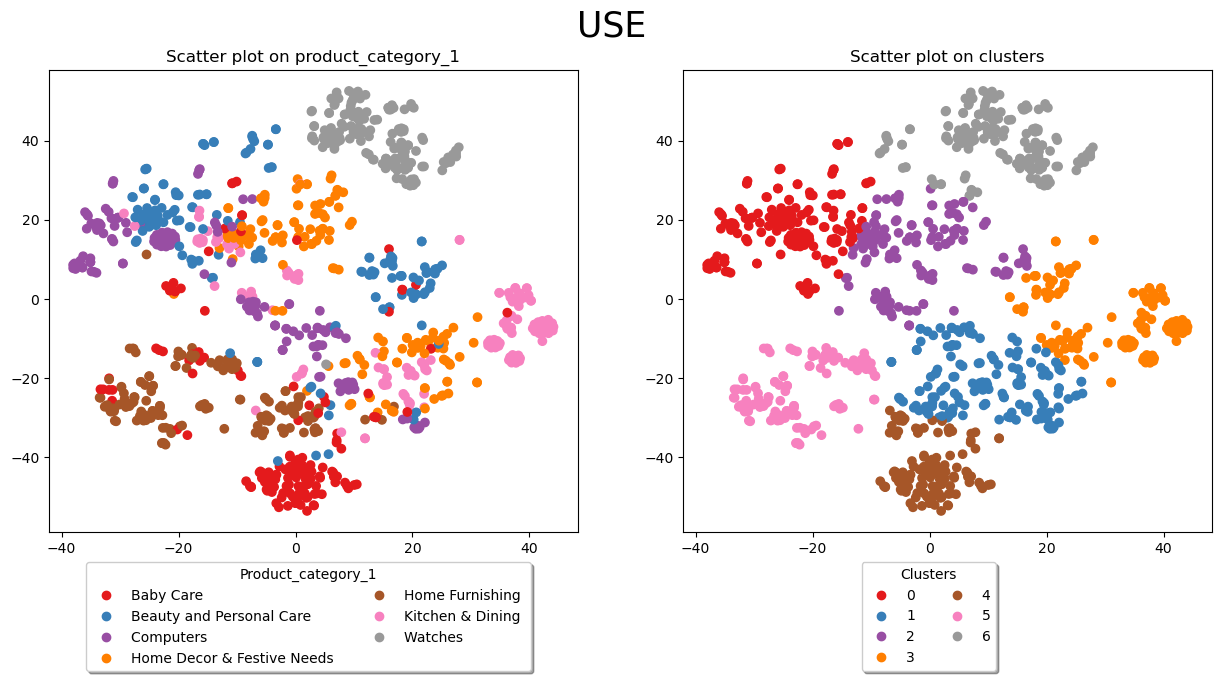

In [67]:
visu_fct(X_tsne, y_cat_num, labels, ARI, 'USE')

## 3. Image Processing

In [68]:
img_path = "./Projet_6_files/Projet_6_images/"

### 3.1 Fucntions

In [69]:
def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist

### 3.2 Image DataFrame

In [70]:
data = pd.DataFrame()
data[['image_path','label_name']] = df [['image','product_category_1']]
le = preprocessing.LabelEncoder()
data["label"] = le.fit_transform(data["label_name"])
data.sample(10)

image_path                   label_name  label
411  5c7b493625b5fc6689cae49d25e1ae17.jpg    Beauty and Personal Care       1
181  59af3731b809a25f2bf99e99f645d8dd.jpg            Kitchen & Dining       5
819  dcab5c08ed8e6c2fa039e01367390071.jpg             Home Furnishing       4
283  4d2e9f36823bad0f6fe8c6b19bb92bdb.jpg                     Watches       6
723  7c785e9e26092c0b6ed038085e90d89d.jpg             Home Furnishing       4
641  eaed0897074ee52230ff6c6d73c18dd4.jpg                   Baby Care       0
285  64a9d0488652194fd8e879d5e6dc8015.jpg                     Watches       6
93   46e6853da6b0c796b7a0d8203ceaa88e.jpg  Home Decor & Festive Needs       3
459  4e09d5a71d46d61de3d4c9c5aedb73f2.jpg    Beauty and Personal Care       1
345  d43d9bb261aaaf818c81a645e727b2d3.jpg                   Computers       2

In [71]:
data.groupby("label").count()

image_path  label_name
label                        
0             150         150
1             150         150
2             150         150
3             150         150
4             150         150
5             150         150
6             150         150

Home Furnishing 


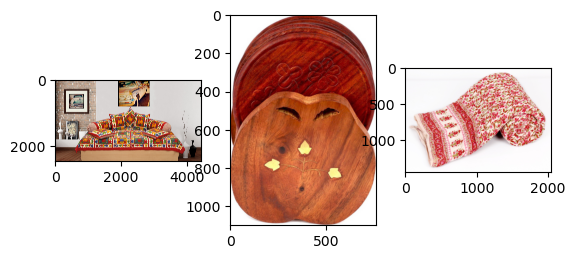


----------------------------------------------------------------------------------------------------

Baby Care 


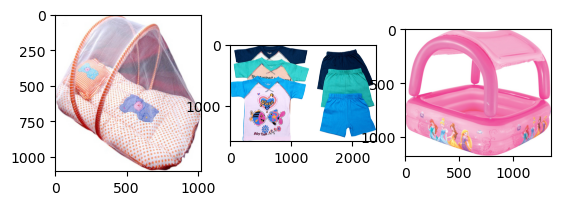


----------------------------------------------------------------------------------------------------

Watches 


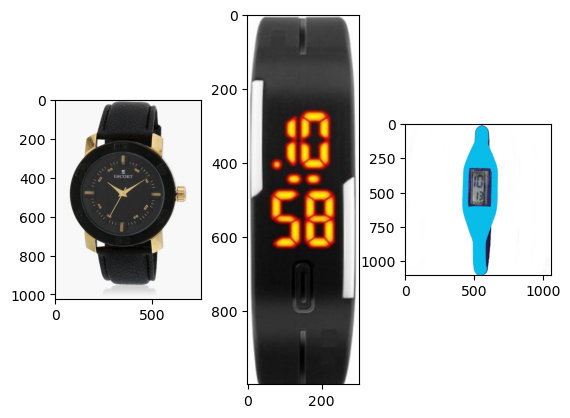


----------------------------------------------------------------------------------------------------

Home Decor & Festive Needs 


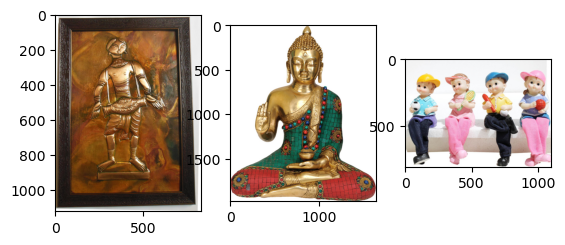


----------------------------------------------------------------------------------------------------

Kitchen & Dining 


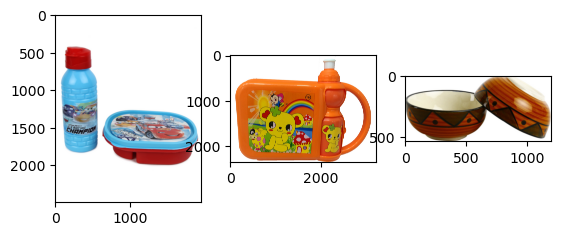


----------------------------------------------------------------------------------------------------

Beauty and Personal Care 


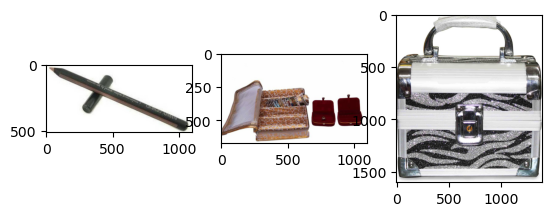


----------------------------------------------------------------------------------------------------

Computers 


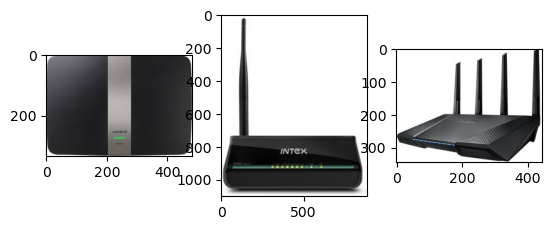


----------------------------------------------------------------------------------------------------



In [72]:
list_Home_Furnishing = data.loc[data["label_name"]=="Home Furnishing ", 'image_path'].tolist()
list_Baby = data.loc[data["label_name"]=="Baby Care ", 'image_path'].tolist()
list_Watches = data.loc[data["label_name"]=="Watches ", 'image_path'].tolist()
list_Home_Decor = data.loc[data["label_name"]=="Home Decor & Festive Needs ", 'image_path'].tolist()
list_Kitchen = data.loc[data["label_name"]=="Kitchen & Dining ", 'image_path'].tolist()
list_Beauty = data.loc[data["label_name"]=="Beauty and Personal Care ", 'image_path'].tolist()
list_Computers = data.loc[data["label_name"]=="Computers ", 'image_path'].tolist()

list_labels = data['label_name'].unique().tolist()

list_photos = data['image_path'].tolist()

for name in list_labels :
    print(name)
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = img_path + data.loc[data["label_name"]==name, 'image_path'].tolist()[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()
    print('\n'+"-"*100+'\n')

### 3.3 ORB

#### 3.3.1 test on one image

cvs version : 4.6.0


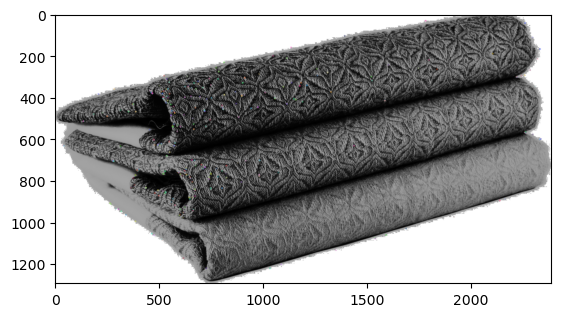

Descriptor shape :  (500, 32)

[[ 52  63 126 ...  35 166  51]
 [219 207  42 ... 148 184  90]
 [182 231 107 ... 144 246 225]
 ...
 [229 204 210 ... 125 232 142]
 [ 45 236  88 ... 251  72 208]
 [ 75  56 250 ... 133  29 127]]


(1293, 2388, 3)

In [73]:
print('cvs version : {}'.format(cv2.__version__))

image = cv2.imread(img_path+list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram

# Initialize the ORB detector algorithm
orb = cv2.ORB_create()

kp, des = orb.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descriptor shape : ", des.shape)
print()
print(des)
img.shape

#### 3.3.2 key points & descriptors

In [74]:
# identification of key points and associated descriptors

orb_keypoints = []
temps1=time.time()
orb = cv2.ORB_create()

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(img_path+list_photos[image_num],0) # convert in gray
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = orb.detectAndCompute(res, None)
    orb_keypoints.append(des)
    

orb_keypoints_by_img = np.asarray(orb_keypoints) #
orb_keypoints_all    = np.concatenate(orb_keypoints_by_img, axis=0)



print()
print("Descriptor shape  : ", orb_keypoints_all.shape)

duration1=time.time()-temps1
print("Processing time of ORB descriptor : ", "%15.2f" % duration1, "sec.")

0
100
200
300
400
500
600
700
800
900
1000

Descriptor shape  :  (520145, 32)
Processing time of ORB descriptor :            41.70 sec.


#### 3.3.3 descriptors clustering

In [75]:
# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(orb_keypoints_all)),0))

print("# of clusters : ", k)
print("Create {} descriptors clusters ...".format(k))

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(orb_keypoints_all)

duration1=time.time()-temps1
print("MiniBatchKMeans' processing time : ", "%15.2f" % duration1, "sec.")

# of clusters :  721
Create 721 descriptors clusters ...
MiniBatchKMeans' processing time :            10.70 sec.


#### 3.3.4 histograms

In [76]:
# Creation of histograms (features)
temps1=time.time()


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(orb_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("Histograms' building time : ", "%15.2f" % duration1, "sec.")


0
100
200
300
400
500
600
700
800
900
1000
Histograms' building time :            98.90 sec.


#### 3.3.5 PCA

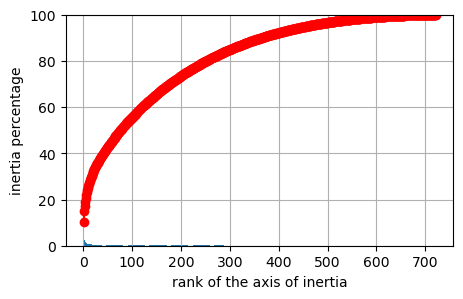

Dataset shape before PCA :  (1050, 721)
Dataset shape after PCA :  (1050, 601)


In [77]:
feat_pca = PCA_fct(pd.DataFrame(im_features))

#### 3.3.6 TSNE, K-Means & ARI score

In [78]:
y_cat_num = np.array(df['product_category_encoder'])

ARI, X_tsne, labels = ARI_fct(feat_pca)
df['ORB_clusters'] = labels

ARI :  0.0325 time :  12.0


#### 3.3.7 results

SCORES : 
ARI score : 0.0325
f1 score : 0.1338
precision score : 0.1337
recal score : 0.1352

----------------------------------------------------------------------------------------------------

CONFUSION MATRIX :



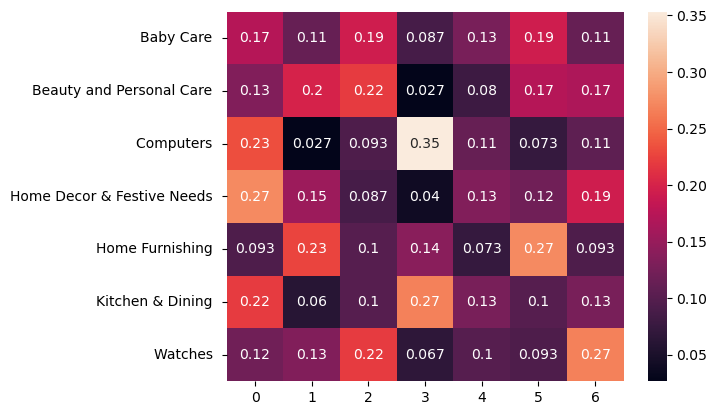


----------------------------------------------------------------------------------------------------

TSNE PLOT :



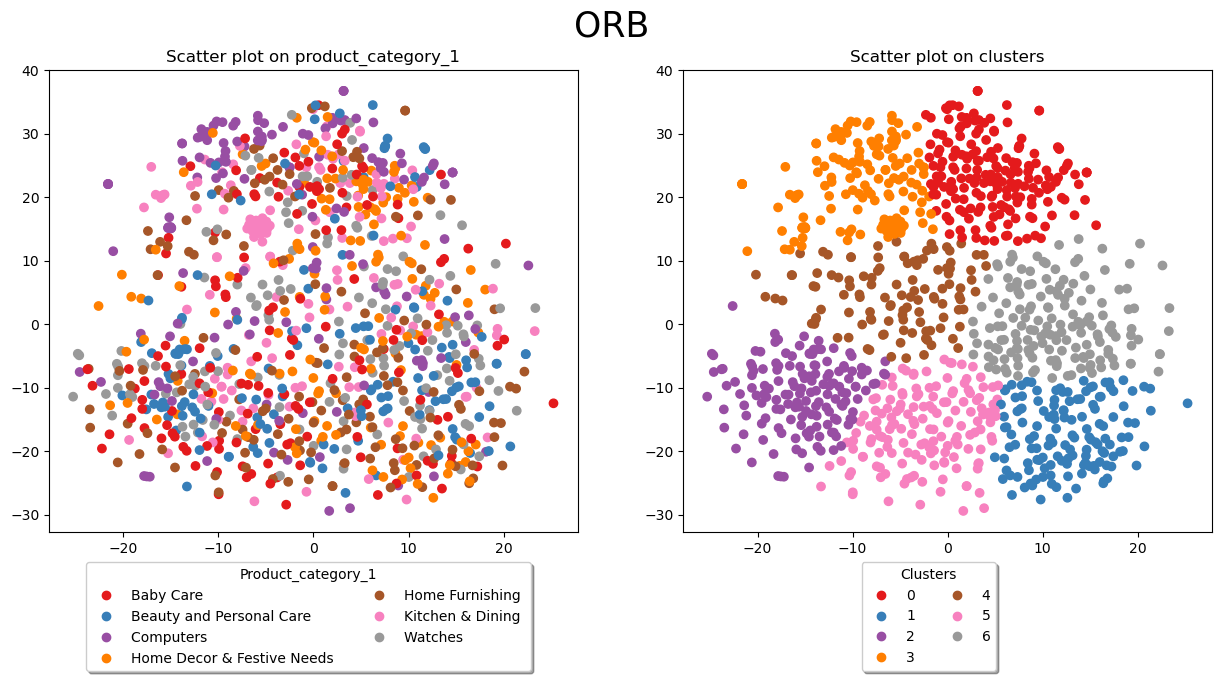

In [79]:
visu_fct(X_tsne, y_cat_num, labels, ARI, 'ORB')

In [80]:
df.groupby("ORB_clusters").count()["product_category_1"]

ORB_clusters
0    187
1    137
2    152
3    147
4    113
5    154
6    160
Name: product_category_1, dtype: int64

In [81]:
y_cat_num = np.array(df['product_category_encoder'])

## 3.4 CNN

#### 3.4.1 pre-processing

In [82]:
HEIGHT = 224
WIDTH=224
SEED = 143
BATCH_SIZE=3

train_datagen = ImageDataGenerator()
train_ds = train_datagen.flow_from_dataframe(data,
                                             directory = img_path,
                                             x_col = "image_path",
                                             y_col = "label_name",
                                             target_size = (HEIGHT,WIDTH),
                                             class_mode='categorical',
                                             batch_size = BATCH_SIZE,
                                             shuffle = False,
                                             seed = SEED,
                                             validate_filenames = False)
# labels
for label in l_cat:
    x,y = data.loc[data['label_name']==label,['label_name','label']].iloc[0]
    print('{}: {}'.format(x,y))
    
train_ds.class_indices

Found 1050 non-validated image filenames belonging to 7 classes.
Baby Care : 0
Beauty and Personal Care : 1
Computers : 2
Home Decor & Festive Needs : 3
Home Furnishing : 4
Kitchen & Dining : 5
Watches : 6


{'Baby Care ': 0,
 'Beauty and Personal Care ': 1,
 'Computers ': 2,
 'Home Decor & Festive Needs ': 3,
 'Home Furnishing ': 4,
 'Kitchen & Dining ': 5,
 'Watches ': 6}

#### 3.4.2 ResNet50

In [83]:
model = ResNet50(include_top=False, weights='imagenet', pooling='avg')
resNet = model.predict(train_ds)

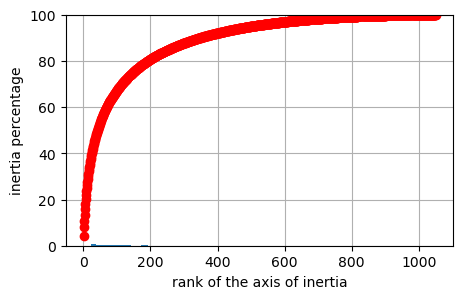

Dataset shape before PCA :  (1050, 2048)
Dataset shape after PCA :  (1050, 784)


In [84]:
resNet_pca = PCA_fct(pd.DataFrame(resNet))

In [85]:
ARI, X_tsne, labels = ARI_fct(resNet_pca)
df['ResNet50_clusters'] = labels

ARI :  0.3709 time :  12.0


SCORES : 
ARI score : 0.3709
f1 score : 0.1161
precision score : 0.1164
recal score : 0.1171

----------------------------------------------------------------------------------------------------

CONFUSION MATRIX :



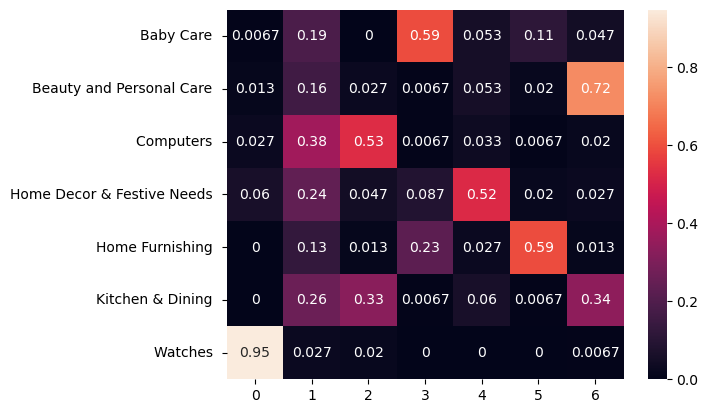


----------------------------------------------------------------------------------------------------

TSNE PLOT :



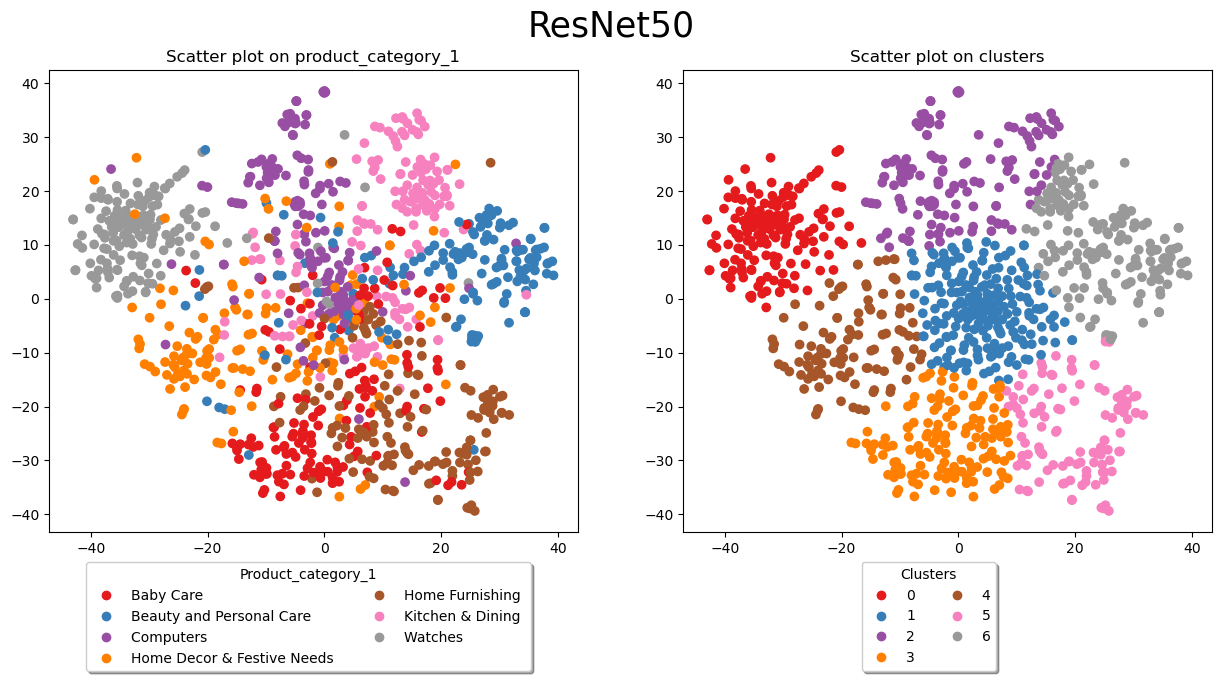

In [86]:
visu_fct(X_tsne, y_cat_num, labels, ARI,'ResNet50')

#### 3.4.3 VGG16

In [87]:
model = VGG16(include_top=False, weights='imagenet', pooling='avg')

In [88]:
vgg = model.predict(train_ds)

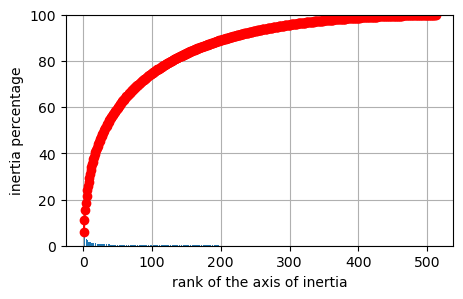

Dataset shape before PCA :  (1050, 512)
Dataset shape after PCA :  (1050, 413)


In [89]:
vgg_pca = PCA_fct(pd.DataFrame(vgg))

In [90]:
ARI, X_tsne, labels = ARI_fct(vgg_pca)
df['VGG16_clusters'] = labels

ARI :  0.394 time :  12.0


SCORES : 
ARI score : 0.394
f1 score : 0.1636
precision score : 0.1569
recal score : 0.1714

----------------------------------------------------------------------------------------------------

CONFUSION MATRIX :



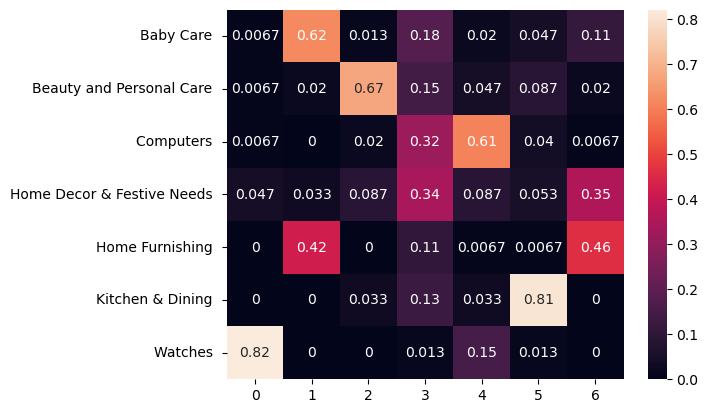


----------------------------------------------------------------------------------------------------

TSNE PLOT :



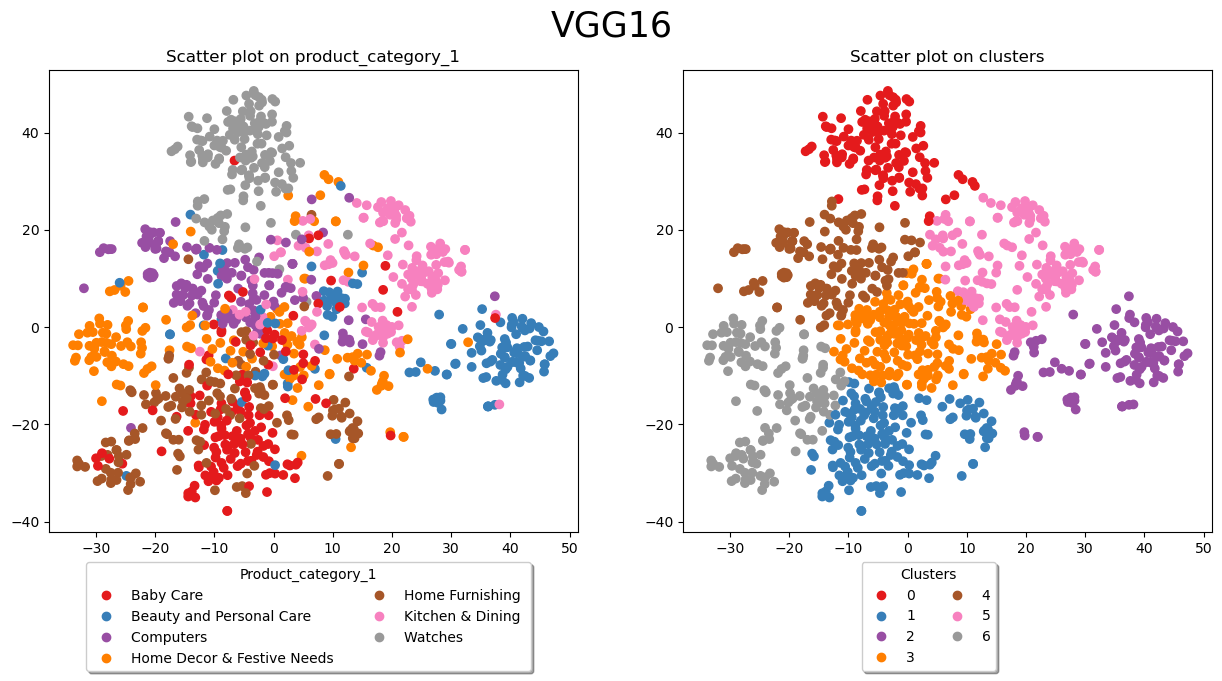

In [91]:
visu_fct(X_tsne, y_cat_num, labels, ARI, 'VGG16')

## SAVE

In [92]:
df.to_csv("./Projet_6_files/clean_data.csv", index=False)

In [93]:
df.sample(5)

uniq_id                                 image  \
724   00cbbc837d340fa163d11e169fbdb952  00cbbc837d340fa163d11e169fbdb952.jpg   
438   ee78c1e94bdc217d1d0eaef5c567417a  ee78c1e94bdc217d1d0eaef5c567417a.jpg   
1019  031c98cfde349d99fb6d5983f54c8751  031c98cfde349d99fb6d5983f54c8751.jpg   
938   9e07a3eeee6aa9e656106281cdd30d67  9e07a3eeee6aa9e656106281cdd30d67.jpg   
1025  30ad2acaccdd2e1691a61c44079c2b5a  30ad2acaccdd2e1691a61c44079c2b5a.jpg   

                                                                    product_name  \
724                              Flazee Home Trends Beige 144.78 cm Table Runner   
438                                    Budding Bees Printed Baby Girl's Jumpsuit   
1019     PRINT SHAPES Power of roman reigns Laptop Skin with Mouse pad Combo Set   
938                  eCraftIndia Lord Ganesha on Elephant Showpiece  -  13.97 cm   
1025  PRINT SHAPES monster university party Laptop Skin with Mouse pad Combo Set   

                                                                                              description  \
724   Buy Flazee Home Trends Beige 144.78 cm Table Runner at Rs. 399 at Flipkart.com. Only Genuine Pro...   
438   Specifications of Budding Bees Printed Baby Girl's Jumpsuit In The Box 1 Jumpsuit Jumpsuit Detai...   
1019  Key Features of PRINT SHAPES Power of roman reigns Laptop Skin with Mouse pad Combo Set Glue Fre...   
938   Buy eCraftIndia Lord Ganesha on Elephant Showpiece  -  13.97 cm for Rs.699 online. eCraftIndia L...   
1025  Key Features of PRINT SHAPES monster university party Laptop Skin with Mouse pad Combo Set Glue ...   

               product_category_1  product_category_encoder  \
724              Home Furnishing                          4   
438                    Baby Care                          0   
1019                   Computers                          2   
938   Home Decor & Festive Needs                          3   
1025                   Computers                          2   

                                                                                        description_clean  \
724                         buy home trend beige table runner genuine product free shipping cash delivery   
438   specification budding bee printed baby girl box detail fabric viscose neck round neck general de...   
1019  key feature print shape power roman reign skin mouse pad set glue free removal inch skin easy ap...   
938   buy lord elephant showpiece lord elephant showpiece best price free shipping cash delivery genui...   
1025  key feature print shape monster university party skin mouse pad set glue free removal inch skin ...   

                                           product_name_clean  \
724                             home trend beige table runner   
438                             budding bee printed baby girl   
1019         print shape power roman reign skin mouse pad set   
938                                   lord elephant showpiece   
1025  print shape monster university party skin mouse pad set   

                                                                                                   corpus  \
724   home trend beige table runnerbuy home trend beige table runner genuine product free shipping cas...   
438   budding bee printed baby girlspecification budding bee printed baby girl box detail fabric visco...   
1019  print shape power roman reign skin mouse pad setkey feature print shape power roman reign skin m...   
938   lord elephant showpiecebuy lord elephant showpiece lord elephant showpiece best price free shipp...   
1025  print shape monster university party skin mouse pad setkey feature print shape monster universit...   

      TfidfVectorizer_clusters  CountVectorizer_clusters  Word2Vec_clusters  \
724                          2                         1                  6   
438                          5                         0                  0   
1019                         0                         0                 